<a href="https://colab.research.google.com/github/sandilyabaruah3023/Deep-Learning-Assignment-IIT/blob/main/Q4_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
jp797498e_twitter_entity_sentiment_analysis_path = kagglehub.dataset_download('jp797498e/twitter-entity-sentiment-analysis')

print('Data source import complete.')

Data source import complete.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Define file paths
train_file_path = '/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv'
validation_file_path = '/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv'

# Load the training dataset
df_train = pd.read_csv(train_file_path, encoding='latin1')

# Display basic info for training data
print("--- Training Data ---")
print(df_train.head())

# Load the validation dataset
df_validation = pd.read_csv(validation_file_path, encoding='latin1')

# Display basic info for validation data
print("\n\n--- Validation Data ---")
print(df_validation.head())

--- Training Data ---
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


--- Validation Data ---
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his g

In [ ]:
import pandas as pd

# Define file paths (if not carried over from a previous cell context in the notebook)
# train_file_path = '/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv'
# validation_file_path = '/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv'

# --- 1. Reload Data with No Header & Assign Column Names ---
column_names = ['TweetID', 'Entity', 'Sentiment', 'Text']

# Load the training dataset without a header and assign names
df_train = pd.read_csv(train_file_path, header=None, names=column_names, encoding='latin1')

# Load the validation dataset without a header and assign names
df_validation = pd.read_csv(validation_file_path, header=None, names=column_names, encoding='latin1')


# --- 2. Verify Training Data ---
print("--- Training Data (with correct columns) ---")
print(df_train.head(3))
df_train.info()
print("\nTraining Sentiment Distribution:")
print(df_train['Sentiment'].value_counts(dropna=False))
print("\nTraining Entity Distribution (Top 5):")
print(df_train['Entity'].value_counts(dropna=False).head())


# --- 3. Verify Validation Data ---
print("\n\n--- Validation Data (with correct columns) ---")
print(df_validation.head(3))
df_validation.info()
print("\nValidation Sentiment Distribution:")
print(df_validation['Sentiment'].value_counts(dropna=False))
print("\nValidation Entity Distribution (Top 5):")
print(df_validation['Entity'].value_counts(dropna=False).head())


--- Training Data (with correct columns) ---
   TweetID       Entity Sentiment  \
0     2401  Borderlands  Positive   
1     2401  Borderlands  Positive   
2     2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB

Training Sentiment Distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Training Entity Distribution (Top 5):
Entit

In [ ]:
import pandas as pd



# --- 1. Handle Missing Values ---
# Display how many missing values before dropping
print("--- Missing values before cleaning (Training) ---")
print(df_train.isnull().sum())
print("\n--- Missing values before cleaning (Validation) ---")
print(df_validation.isnull().sum())

# Drop rows where 'Text' or 'Sentiment' is NaN
df_train.dropna(subset=['Text', 'Sentiment'], inplace=True)
df_validation.dropna(subset=['Text', 'Sentiment'], inplace=True)

# Convert 'Text' column to string type to avoid errors with text processing
df_train['Text'] = df_train['Text'].astype(str)
df_validation['Text'] = df_validation['Text'].astype(str)

print("\n--- Shape after dropping NaN (Training) ---")
print(df_train.shape)
print("\n--- Shape after dropping NaN (Validation) ---")
print(df_validation.shape)

# --- 2. Map Sentiment Labels to Integers ---
# Get unique sentiment labels to define a mapping
all_sentiments = pd.concat([df_train['Sentiment'], df_validation['Sentiment']]).unique()
sentiment_map = {sentiment: i for i, sentiment in enumerate(all_sentiments)}
# Example: {'Positive': 0, 'Negative': 1, 'Neutral': 2, 'Irrelevant': 3} (order might vary)

print("\nSentiment to Integer Mapping:")
print(sentiment_map)

# Apply the mapping
df_train['SentimentLabel'] = df_train['Sentiment'].map(sentiment_map)
df_validation['SentimentLabel'] = df_validation['Sentiment'].map(sentiment_map)

# --- 3. Verify Changes ---
print("\n--- Training Data (after cleaning and mapping) ---")
print(df_train[['Text', 'Sentiment', 'SentimentLabel']].head(3))
df_train.info()
print("\nTraining SentimentLabel Distribution:")
print(df_train['SentimentLabel'].value_counts(dropna=False))

print("\n\n--- Validation Data (after cleaning and mapping) ---")
print(df_validation[['Text', 'Sentiment', 'SentimentLabel']].head(3))
df_validation.info()
print("\nValidation SentimentLabel Distribution:")
print(df_validation['SentimentLabel'].value_counts(dropna=False))

# Store the number of unique labels for model configuration later
num_labels = len(sentiment_map)
print(f"\nNumber of unique sentiment labels: {num_labels}")


--- Missing values before cleaning (Training) ---
TweetID        0
Entity         0
Sentiment      0
Text         686
dtype: int64

--- Missing values before cleaning (Validation) ---
TweetID      0
Entity       0
Sentiment    0
Text         0
dtype: int64

--- Shape after dropping NaN (Training) ---
(73996, 4)

--- Shape after dropping NaN (Validation) ---
(1000, 4)

Sentiment to Integer Mapping:
{'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Irrelevant': 3}

--- Training Data (after cleaning and mapping) ---
                                                Text Sentiment  SentimentLabel
0  im getting on borderlands and i will murder yo...  Positive               0
1  I am coming to the borders and I will kill you...  Positive               0
2  im getting on borderlands and i will kill you ...  Positive               0
<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          -

In [ ]:
from transformers import BertTokenizer
import pandas as pd # In case it's a new cell and pandas is needed for df operations

# --- (Assuming df_train and df_validation are available from the previous step) ---
# --- (And sentiment_map and num_labels are also available if needed in this scope) ---

# --- 1. Initialize Tokenizer ---
# We'll use 'bert-base-uncased' as a common choice.
# 'uncased' means the text is converted to lowercase by the tokenizer.
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# --- 2. Tokenize Text Data ---
# We will tokenize the 'Text' column for both training and validation sets.
# We'll keep it simple for now by padding/truncating to a fixed length.
# A common max length is 128, but this can be adjusted based on your text lengths.
MAX_LENGTH = 128

# Tokenize training data
train_encodings = tokenizer(
    df_train['Text'].tolist(),
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH,
    return_tensors='pt' # Return PyTorch tensors
)

# Tokenize validation data
validation_encodings = tokenizer(
    df_validation['Text'].tolist(),
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH,
    return_tensors='pt' # Return PyTorch tensors
)

# --- 3. Inspect Tokenized Output (Optional) ---
print("--- Tokenized Training Data (Input IDs shape) ---")
print(train_encodings['input_ids'].shape)
print(train_encodings['input_ids'][0]) # Show the input IDs for the first training sample

print("\n--- Tokenized Validation Data (Input IDs shape) ---")
print(validation_encodings['input_ids'].shape)

# The train_encodings and validation_encodings are dictionaries containing:
# - input_ids: The numerical representations of tokens.
# - attention_mask: Indicates which tokens should be attended to (1) and which are padding (0).
# - token_type_ids (for some models): Used for sequence pair tasks, not critical for basic sentiment analysis.

# We will use these encodings to create datasets for PyTorch in the next step.
# Also, save the labels as PyTorch tensors.
import torch

train_labels = torch.tensor(df_train['SentimentLabel'].values)
validation_labels = torch.tensor(df_validation['SentimentLabel'].values)

print("\n--- Training Labels Tensor Shape ---")
print(train_labels.shape)
print(train_labels[0:5]) # Show first 5 labels

print("\n--- Validation Labels Tensor Shape ---")
print(validation_labels.shape)

# Store these for the next step (creating PyTorch Datasets/DataLoaders)
# For example, you might want to access:
# train_input_ids = train_encodings['input_ids']
# train_attention_mask = train_encodings['attention_mask']
# validation_input_ids = validation_encodings['input_ids']
# validation_attention_mask = validation_encodings['attention_mask']


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

--- Tokenized Training Data (Input IDs shape) ---
torch.Size([73996, 128])
tensor([  101, 10047,  2893,  2006,  3675,  8653,  1998,  1045,  2097,  4028,
         2017,  2035,  1010,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,    

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler

# --- (Assuming train_encodings, validation_encodings, train_labels, validation_labels ---
# --- are available from the previous tokenization step) ---
# train_input_ids = train_encodings['input_ids']
# train_attention_mask = train_encodings['attention_mask']
# validation_input_ids = validation_encodings['input_ids']
# validation_attention_mask = validation_encodings['attention_mask']
# num_labels = 4 # Should be available from previous steps (len(sentiment_map))

# --- 1. Create a Custom PyTorch Dataset ---
class TweetSentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # The encodings dictionary itself contains tensors, so we index into those
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx].clone().detach()
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects
train_dataset = TweetSentimentDataset(train_encodings, train_labels)
validation_dataset = TweetSentimentDataset(validation_encodings, validation_labels)

# --- 2. Create DataLoaders ---
# DataLoader will take care of batching and shuffling
BATCH_SIZE = 16 # You can adjust this based on your GPU memory

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset), # Select batches randomly
    batch_size=BATCH_SIZE
)

validation_dataloader = DataLoader(
    validation_dataset,
    sampler=SequentialSampler(validation_dataset), # Pull out batches sequentially
    batch_size=BATCH_SIZE
)

# --- 3. Inspect a Batch (Optional) ---
print("--- Sample batch from Training DataLoader ---")
try:
    sample_batch = next(iter(train_dataloader))
    print("Batch keys:", sample_batch.keys())
    print("Input IDs shape:", sample_batch['input_ids'].shape) # Should be [BATCH_SIZE, MAX_LENGTH]
    print("Attention Mask shape:", sample_batch['attention_mask'].shape) # Should be [BATCH_SIZE, MAX_LENGTH]
    print("Labels shape:", sample_batch['labels'].shape) # Should be [BATCH_SIZE]
except Exception as e:
    print(f"Error inspecting batch: {e}")
    print("Ensure train_encodings and train_labels were correctly created in the previous step.")

print(f"\nNumber of training batches: {len(train_dataloader)}")
print(f"Number of validation batches: {len(validation_dataloader)}")

# These dataloaders are now ready to be used in the training loop.


--- Sample batch from Training DataLoader ---
Batch keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
Input IDs shape: torch.Size([16, 128])
Attention Mask shape: torch.Size([16, 128])
Labels shape: torch.Size([16])

Number of training batches: 4625
Number of validation batches: 63


In [ ]:
import torch
from torch.optim import AdamW # Changed this line
from transformers import BertForSequenceClassification, get_linear_schedule_with_warmup

# --- (Assuming train_dataloader, validation_dataloader are available) ---
# --- (And MODEL_NAME = 'bert-base-uncased' and num_labels = 4 are defined) ---
# If num_labels is not in the current scope from previous cells, ensure it's defined:
# For example, if sentiment_map = {'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Irrelevant': 3}
# num_labels = len(sentiment_map) # Should be 4

# --- 1. Define the Model ---
# Load BertForSequenceClassification, the pre-trained BERT model with a sequence classification head on top.
# We need to specify the number of labels our model should predict.
if 'num_labels' not in globals() and 'num_labels' not in locals():
    print("Warning: 'num_labels' not found. Assuming 4 labels based on previous context.")
    num_labels = 4 # Defaulting, ensure this is correct for your dataset

if 'MODEL_NAME' not in globals() and 'MODEL_NAME' not in locals():
    print("Warning: 'MODEL_NAME' not found. Assuming 'bert-base-uncased'.")
    MODEL_NAME = 'bert-base-uncased'


model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels, # The number of output labels for classification.
    output_attentions=False, # Whether the model returns attentions weights.
    output_hidden_states=False, # Whether the model returns all hidden-states.
)

# --- 2. Set up GPU/CPU Device ---
# Tell PyTorch to use the GPU if available, otherwise use the CPU.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('We will use the GPU:', torch.cuda.get_device_name(0))
    model.cuda() # Send model to GPU
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')
    model.to(device) # Send model to CPU (or it's already there)


# --- 3. Optimizer ---
# AdamW is a class from the huggingface library (as opposed to pytorch)
# 'W' stands for 'Weight Decay fix'
optimizer = AdamW(
    model.parameters(),
    lr=2e-5, # Adam learning rate (a common starting point for BERT)
    eps=1e-8 # Adam epsilon (for numerical stability)
)

# --- 4. Learning Rate Scheduler ---
# Create a schedule with a learning rate that decreases linearly from the initial lr set in the optimizer to 0, after
# a warmup period during which it increases linearly from 0 to the initial lr set in the optimizer.
EPOCHS = 3 # Number of training epochs (e.g., 2-4 are common for fine-tuning BERT)
total_steps = len(train_dataloader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0, # Default value in run_glue.py
    num_training_steps=total_steps
)

print(f"\nModel: {MODEL_NAME}")
print(f"Number of labels: {num_labels}")
print(f"Device: {device.type}")
print(f"Batch Size (from previous step, for reference): {train_dataloader.batch_size if train_dataloader else 'N/A'}") # Assuming BATCH_SIZE was used for dataloader
print(f"Epochs: {EPOCHS}")
print(f"Total training steps: {total_steps}")
print("Optimizer and Scheduler are set up.")

# The model, optimizer, scheduler, and device are now ready for the training loop.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


There are 1 GPU(s) available.
We will use the GPU: Tesla T4

Model: bert-base-uncased
Number of labels: 4
Device: cuda
Batch Size (from previous step, for reference): 16
Epochs: 3
Total training steps: 13875
Optimizer and Scheduler are set up.


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import time
import datetime

# --- (Assuming model, optimizer, scheduler, device, train_dataloader, validation_dataloader, EPOCHS ---
# --- are available from the previous steps) ---
# --- (And num_labels = 4 is defined) ---

if 'num_labels' not in globals() and 'num_labels' not in locals():
    print("Warning: 'num_labels' not found. Assuming 4 labels based on previous context.")
    num_labels = 4

if 'EPOCHS' not in globals() and 'EPOCHS' not in locals():
    print("Warning: 'EPOCHS' not found. Assuming 3 epochs based on previous context.")
    EPOCHS = 3

# Helper function to format time
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# Store training and validation loss, validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

print("Starting Training Loop...")

for epoch_i in range(0, EPOCHS):
    # ========================================
    #               Training
    # ========================================
    print(f"\n======== Epoch {epoch_i + 1} / {EPOCHS} ========")
    print('Training...')

    t0 = time.time() # Measure how long the training epoch takes.
    total_train_loss = 0
    model.train() # Put the model into training mode.

    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(f'  Batch {step:>5,}  of  {len(train_dataloader):>5,}.    Elapsed: {elapsed}.')

        # Unpack this training batch from our dataloader.
        # `batch` contains three PyTorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch['input_ids'].to(device)
        b_attention_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        # Starting from transformers v4.x, token_type_ids are not strictly required for BertForSequenceClassification
        # if they are all zeros (which is the case for single sequence classification).
        # If your tokenizer provides them and they are part of your 'batch', you can pass them.
        # b_token_type_ids = batch['token_type_ids'].to(device)

        model.zero_grad() # Clear any previously calculated gradients before performing a backward pass.

        # Perform a forward pass (evaluate the model on this training batch).
        # The model returns the loss (when `labels` are provided) and the logits.
        outputs = model(b_input_ids,
                        token_type_ids=None, # Can be None if not used or not in batch
                        attention_mask=b_attention_mask,
                        labels=b_labels)

        loss = outputs.loss
        logits = outputs.logits # Logits are the raw scores output by the last layer of the model

        total_train_loss += loss.item()
        loss.backward() # Perform a backward pass to calculate the gradients.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clip the norm of the gradients to 1.0 to prevent "exploding gradients".
        optimizer.step() # Update parameters and take a step using the computed gradient.
        scheduler.step() # Update the learning rate.

    avg_train_loss = total_train_loss / len(train_dataloader) # Calculate the average loss over all of the batches.
    training_time = format_time(time.time() - t0) # Measure how long this epoch took.

    print(f"\n  Average training loss: {avg_train_loss:.4f}")
    print(f"  Training epoch took: {training_time}")

    # ========================================
    #               Validation
    # ========================================
    print("\nRunning Validation...")
    t0 = time.time() # Measure how long the validation run takes.
    model.eval() # Put the model in evaluation mode.

    total_eval_accuracy = 0
    total_eval_loss = 0
    all_preds = []
    all_true_labels = []

    for batch in validation_dataloader:
        b_input_ids = batch['input_ids'].to(device)
        b_attention_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)
        # b_token_type_ids = batch['token_type_ids'].to(device)


        with torch.no_grad(): # Tell pytorch not to bother with constructing the compute graph during the forward pass, since this is only needed for backprop (training).
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_attention_mask,
                            labels=b_labels)

        loss = outputs.loss
        logits = outputs.logits

        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy() # Move logits to CPU
        label_ids = b_labels.to('cpu').numpy() # Move labels to CPU

        preds = np.argmax(logits, axis=1).flatten()
        all_preds.extend(preds)
        all_true_labels.extend(label_ids)

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_accuracy = accuracy_score(all_true_labels, all_preds)
    validation_time = format_time(time.time() - t0)

    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Validation Accuracy: {validation_accuracy:.4f}")
    print(f"  Validation took: {validation_time}")

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': validation_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    # Detailed classification report for the last epoch (or you can do it for the best epoch)
    if epoch_i == EPOCHS -1 : # Last epoch
        # Assuming sentiment_map = {'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Irrelevant': 3}
        # You might need to define target_names based on your sentiment_map's keys if it's not in scope
        if 'sentiment_map' in globals() or 'sentiment_map' in locals():
             target_names_list = sorted(sentiment_map, key=sentiment_map.get)
        else: # Fallback if sentiment_map is not available
            print("Warning: sentiment_map not found. Using generic label names for classification report.")
            target_names_list = [f"Label {i}" for i in range(num_labels)]
        print("\nClassification Report (Validation Set - Last Epoch):")
        print(classification_report(all_true_labels, all_preds, target_names=target_names_list, digits=4))


print("\nTraining complete!")
print(f"Total training took {format_time(time.time()-total_t0)} (h:mm:ss)")

# Display per-epoch statistics
print("\n--- Training Statistics ---")
for stat in training_stats:
    print(stat)


Starting Training Loop...

======== Epoch 1 / 3 ========
Training...
  Batch    40  of  4,625.    Elapsed: 0:00:14.
  Batch    80  of  4,625.    Elapsed: 0:00:27.
  Batch   120  of  4,625.    Elapsed: 0:00:41.
  Batch   160  of  4,625.    Elapsed: 0:00:54.
  Batch   200  of  4,625.    Elapsed: 0:01:08.
  Batch   240  of  4,625.    Elapsed: 0:01:22.
  Batch   280  of  4,625.    Elapsed: 0:01:36.
  Batch   320  of  4,625.    Elapsed: 0:01:50.
  Batch   360  of  4,625.    Elapsed: 0:02:04.
  Batch   400  of  4,625.    Elapsed: 0:02:18.
  Batch   440  of  4,625.    Elapsed: 0:02:32.
  Batch   480  of  4,625.    Elapsed: 0:02:45.
  Batch   520  of  4,625.    Elapsed: 0:02:59.
  Batch   560  of  4,625.    Elapsed: 0:03:13.
  Batch   600  of  4,625.    Elapsed: 0:03:27.
  Batch   640  of  4,625.    Elapsed: 0:03:41.
  Batch   680  of  4,625.    Elapsed: 0:03:55.
  Batch   720  of  4,625.    Elapsed: 0:04:08.
  Batch   760  of  4,625.    Elapsed: 0:04:22.
  Batch   800  of  4,625.    Elapsed: 

--- Starting Evaluation and Plotting ---
Running model on validation set...
Validation processing took: 7.20 seconds
  Average Validation Loss: 0.1644
  Validation Accuracy: 0.9660
  Validation F1 (Macro): 0.9647
  Validation F1 (Weighted): 0.9660


--- Detailed Metrics and Visualizations for Validation Set ---

Classification Report:
              precision    recall  f1-score   support

    Positive     0.9444    0.9819    0.9628       277
     Neutral     0.9753    0.9684    0.9718       285
    Negative     0.9736    0.9699    0.9718       266
  Irrelevant     0.9756    0.9302    0.9524       172

    accuracy                         0.9660      1000
   macro avg     0.9672    0.9626    0.9647      1000
weighted avg     0.9663    0.9660    0.9660      1000



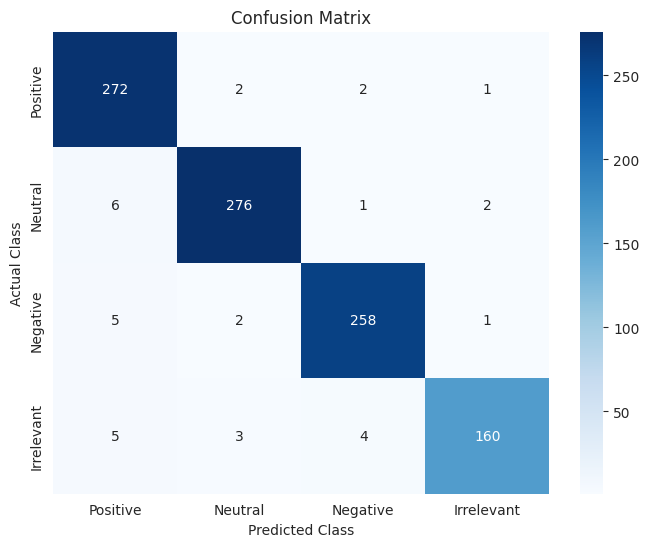

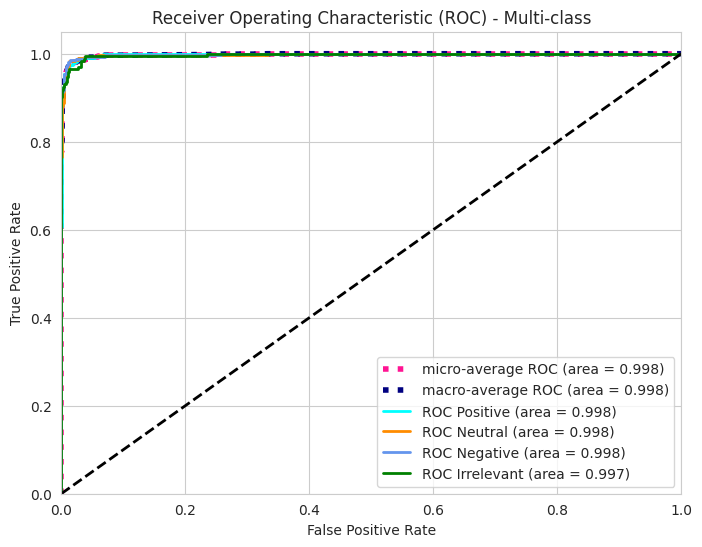

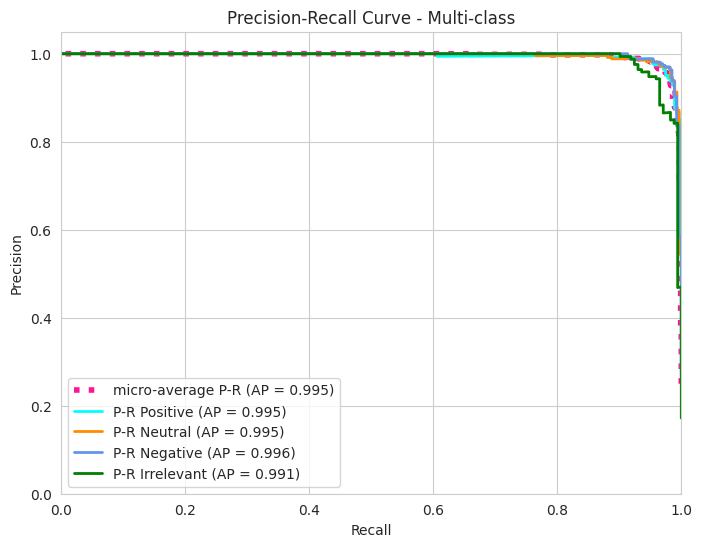


Finished generating standalone evaluation metrics and plots.


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import time # For timestamp in prints, if desired

# --- Ensure these variables are defined from previous steps ---
# model: Your trained BertForSequenceClassification model
# validation_dataloader: Your DataLoader for the validation set
# device: The torch.device (e.g., cuda or cpu)
# num_labels: The number of unique sentiment labels (e.g., 4)
# sentiment_map: Dictionary mapping sentiment strings to integer labels

# --- Check if necessary variables exist, provide warnings if not ---
if 'model' not in globals() or 'model' not in locals():
    print("Error: 'model' is not defined. Please load or train your model first.")
    # You might want to stop execution here if model is missing
    raise NameError("Model not found. Please ensure it's loaded/trained.")

if 'validation_dataloader' not in globals() or 'validation_dataloader' not in locals():
    print("Error: 'validation_dataloader' is not defined. Please prepare your validation dataloader.")
    raise NameError("Validation DataLoader not found.")

if 'device' not in globals() or 'device' not in locals():
    print("Warning: 'device' not defined. Assuming 'cpu'. Set this appropriately.")
    device = torch.device("cpu")
    model.to(device) # Ensure model is on the assumed device

if 'num_labels' not in globals() or 'num_labels' not in locals():
    print("Warning: 'num_labels' not found. Assuming 4. This is critical for plotting.")
    num_labels = 4 # Adjust if necessary

if 'sentiment_map' not in globals() or 'sentiment_map' not in locals():
    print("Warning: 'sentiment_map' not found. Using generic label names for plots.")
    target_names_list = [f"Label {i}" for i in range(num_labels)]
else:
    target_names_list = sorted(sentiment_map, key=sentiment_map.get)


print("--- Starting Evaluation and Plotting ---")
model.eval() # Put the model in evaluation mode

val_true_labels = []
val_pred_probs = []
val_preds = []
total_eval_loss = 0 # Optional: if you want to compute loss as well

print("Running model on validation set...")
t0 = time.time()

for batch in validation_dataloader:
    b_input_ids = batch['input_ids'].to(device)
    b_attention_mask = batch['attention_mask'].to(device)
    b_labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_attention_mask,
                        labels=b_labels) # Include labels to get loss if needed

    # If you calculate loss:
    if hasattr(outputs, 'loss') and outputs.loss is not None:
        total_eval_loss += outputs.loss.item()

    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()

    val_pred_probs.extend(probs)
    val_preds.extend(np.argmax(probs, axis=1).flatten())
    val_true_labels.extend(b_labels.to('cpu').numpy())

validation_time = time.time() - t0
print(f"Validation processing took: {validation_time:.2f} seconds")

if total_eval_loss > 0: # if loss was calculated
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    print(f"  Average Validation Loss: {avg_val_loss:.4f}")

val_accuracy = accuracy_score(val_true_labels, val_preds)
val_f1_macro = f1_score(val_true_labels, val_preds, average='macro', zero_division=0)
val_f1_weighted = f1_score(val_true_labels, val_preds, average='weighted', zero_division=0)

print(f"  Validation Accuracy: {val_accuracy:.4f}")
print(f"  Validation F1 (Macro): {val_f1_macro:.4f}")
print(f"  Validation F1 (Weighted): {val_f1_weighted:.4f}")


# Ensure val_pred_probs is a NumPy array for sklearn functions
val_pred_probs = np.array(val_pred_probs)

# ===================================================================================
# --- Detailed Metrics and Visualizations ---
# ===================================================================================
print("\n\n--- Detailed Metrics and Visualizations for Validation Set ---")

# 1. Classification Report
print("\nClassification Report:")
print(classification_report(val_true_labels, val_preds, target_names=target_names_list, digits=4, zero_division=0))

# Binarize the labels for ROC/PR curves (still needed for those plots)
y_true_binarized = label_binarize(val_true_labels, classes=range(num_labels))

# Plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [8, 6] # Default figure size, can be adjusted per plot

# 2. Confusion Matrix
cm = confusion_matrix(val_true_labels, val_preds)
plt.figure(figsize=(8,6)) # You can adjust the size of the confusion matrix plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names_list, yticklabels=target_names_list)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


# 3. ROC AUC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], val_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), val_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_labels)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_labels):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_labels
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure() # New figure for ROC
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
plot_colors = [next(colors) for _ in range(num_labels)]


plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC (area = {roc_auc["micro"]:0.3f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC (area = {roc_auc["macro"]:0.3f})',
         color='navy', linestyle=':', linewidth=4)

for i in range(num_labels):
    plt.plot(fpr[i], tpr[i], color=plot_colors[i], lw=2,
             label=f'ROC {target_names_list[i]} (area = {roc_auc[i]:0.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 4. Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_labels):
    precision[i], recall[i], _ = precision_recall_curve(y_true_binarized[:, i], val_pred_probs[:, i])
    average_precision[i] = average_precision_score(y_true_binarized[:, i], val_pred_probs[:, i])

# Micro-average Precision-Recall curve and Average Precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_binarized.ravel(), val_pred_probs.ravel())
average_precision["micro"] = average_precision_score(y_true_binarized, val_pred_probs, average="micro")

plt.figure() # New figure for P-R
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
plot_colors = [next(colors) for _ in range(num_labels)]


plt.plot(recall["micro"], precision["micro"],
         label=f'micro-average P-R (AP = {average_precision["micro"]:0.3f})',
         color='deeppink', linestyle=':', linewidth=4)

for i in range(num_labels):
    plt.plot(recall[i], precision[i], color=plot_colors[i], lw=2,
             label=f'P-R {target_names_list[i]} (AP = {average_precision[i]:0.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multi-class')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print("\nFinished generating standalone evaluation metrics and plots.")



# Task
Save the trained BERT model, prepare test data from "test.csv", and evaluate the model's performance on the test data.

## Save the trained model

### Subtask:
Save the state dictionary of the trained BERT model.


**Reasoning**:
Save the state dictionary of the trained BERT model to a file.



In [ ]:
import torch

# Define the file path to save the model state dictionary
model_save_path = './bert_sentiment_model_state_dict.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

# Print a confirmation message
print(f"Model state dictionary saved to: {model_save_path}")

Model state dictionary saved to: ./bert_sentiment_model_state_dict.pth


In [ ]:
# Check if files exist
import os

print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())

# Check specifically for our files
print("sentiment_model.pkl exists:", os.path.exists('sentiment_model.pkl'))
print("tfidf_vectorizer.pkl exists:", os.path.exists('tfidf_vectorizer.pkl'))

Current directory: /content
Files in directory: ['.config', 'bert_sentiment_model_state_dict.pth', 'sample_data']
sentiment_model.pkl exists: False
tfidf_vectorizer.pkl exists: False


In [ ]:
# Cell 2: Create a function to predict sentiment of new text
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/wordnet')
except nltk.downloader.DownloadError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')


# Create a function to predict sentiment of new text
def predict_sentiment(text):
    """
    Predicts sentiment of the given text (positive, negative, or neutral)
    """
    # Preprocess the text (same as during training)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    cleaned_text = ' '.join(words)

    # Vectorize the text
    text_vector = tfidf.transform([cleaned_text])

    # Make prediction
    prediction = model.predict(text_vector)
    prediction_proba = model.predict_proba(text_vector)

    return prediction[0], prediction_proba[0]

# Test the function
test_text = "I really enjoyed this product, it works great!"
sentiment, probabilities = predict_sentiment(test_text)
print(f"Text: '{test_text}'")
print(f"Predicted sentiment: {sentiment}")
print("Probability scores:", probabilities)

AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'

In [ ]:
# Corrected NLTK downloads
import nltk

nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

print("NLTK downloads complete (wordnet, stopwords).")

NLTK downloads complete (wordnet, stopwords).


## Making Predictions with the Trained BERT Model

Now that the model is trained, let's create a function to predict the sentiment of new text using the trained BERT model.

This involves:
1. Preprocessing the text (similar to training, but using the BERT tokenizer).
2. Converting the processed text into input tensors that the BERT model expects.
3. Passing the tensors through the trained model to get logits.
4. Applying a softmax function to the logits to get probability distributions over the sentiment classes.
5. Determining the predicted sentiment label.

In [ ]:
import torch
from transformers import BertTokenizer
import re # For cleaning the text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary variables are available from previous steps
# model: Your trained BertForSequenceClassification model
# tokenizer: Your BertTokenizer ('bert-base-uncased')
# device: The torch.device (e.g., cuda or cpu)
# sentiment_map: Dictionary mapping sentiment strings to integer labels

# --- Check if necessary variables exist, provide warnings if not ---
if 'model' not in globals() or 'model' not in locals():
    print("Error: 'model' is not defined. Please ensure your model is loaded or trained.")
    raise NameError("Model not found.")

if 'tokenizer' not in globals() or 'tokenizer' not in locals():
    print("Error: 'tokenizer' is not defined. Please initialize your tokenizer.")
    # Initialize a default tokenizer if not found
    try:
        MODEL_NAME = 'bert-base-uncased' # Assuming this was used before
        tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
        print(f"Warning: 'tokenizer' not found. Initialized a new BertTokenizer: {MODEL_NAME}")
    except Exception as e:
        print(f"Error initializing tokenizer: {e}")
        raise NameError("Tokenizer not found and could not be initialized.")


if 'device' not in globals() or 'device' not in locals():
    print("Warning: 'device' not defined. Assuming 'cpu'. Set this appropriately.")
    device = torch.device("cpu")
    model.to(device) # Ensure model is on the assumed device

if 'sentiment_map' not in globals() or 'sentiment_map' not in locals():
    print("Warning: 'sentiment_map' not found. Cannot map predicted label index back to sentiment string.")
    # Create a dummy map if necessary, but this won't provide meaningful sentiment names
    if 'num_labels' in globals() or 'num_labels' in locals():
         sentiment_map = {i: f"Label {i}" for i in range(num_labels)}
         print(f"Using default sentiment map: {sentiment_map}")
    else:
         print("Error: 'num_labels' also not defined. Cannot create a default sentiment map.")
         raise NameError("Sentiment map not found.")

# Invert the sentiment_map to get label index to sentiment string mapping
# Handle potential missing sentiment_map case again here
if 'sentiment_map' in globals() or 'sentiment_map' in locals():
    id_to_sentiment = {v: k for k, v in sentiment_map.items()}
else:
    # This fallback should be covered by the check above, but adding for robustness
    id_to_sentiment = {i: f"Label {i}" for i in range(model.config.num_labels)}
    print("Warning: Using default id_to_sentiment map.")


# Ensure model is in evaluation mode
model.eval()

def predict_sentiment_bert(text, tokenizer, model, device, max_length=128):
    """
    Predicts sentiment of the given text using the trained BERT model.

    Args:
        text (str): The input text string.
        tokenizer: The initialized BERT tokenizer.
        model: The trained BertForSequenceClassification model.
        device: The device (cuda or cpu) the model is on.
        max_length (int): The maximum sequence length for tokenization.

    Returns:
        tuple: (predicted_sentiment_string, probability_scores_numpy_array)
    """
    # Preprocess the text (basic cleaning)
    # Note: BERT tokenizer handles lowercasing and punctuation, but you might
    # want to keep your custom cleaning based on the original data preprocessing.
    # For simplicity here, we'll do minimal cleaning suitable for BERT.
    cleaned_text = text.lower()
    # Optional: more cleaning if needed, e.g., removing URLs, mentions etc.

    # Tokenize the text
    encoding = tokenizer(
        cleaned_text,
        truncation=True,
        padding=True, # Pad a single sentence to max_length
        max_length=max_length,
        return_tensors='pt' # Return PyTorch tensors
    )

    # Move tensors to the device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    # token_type_ids = encoding['token_type_ids'].to(device) # Often not needed for single sequence

    with torch.no_grad(): # No need to calculate gradients for inference
        outputs = model(input_ids, attention_mask=attention_mask)
        # outputs = model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask) # If token_type_ids are used

    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1).squeeze().cpu().numpy() # Apply softmax and move to CPU

    # Get the predicted label index
    predicted_label_index = np.argmax(probs)

    # Map the index back to the sentiment string
    # Use the id_to_sentiment map
    predicted_sentiment_string = id_to_sentiment.get(predicted_label_index, f"Unknown Label {predicted_label_index}")


    return predicted_sentiment_string, probs

# Test the function
test_text_1 = "I really enjoyed this product, it works great!"
sentiment_1, probabilities_1 = predict_sentiment_bert(test_text_1, tokenizer, model, device, MAX_LENGTH)
print(f"Text: '{test_text_1}'")
print(f"Predicted sentiment: {sentiment_1}")
# Print probabilities with corresponding labels
if 'id_to_sentiment' in globals() or 'id_to_sentiment' in locals():
    print("Probability scores:")
    for i, prob in enumerate(probabilities_1):
        print(f"  {id_to_sentiment.get(i, f'Label {i}')}: {prob:.4f}")
else:
     print("Probability scores:", probabilities_1)


print("-" * 30)

test_text_2 = "I hate you."
sentiment_2, probabilities_2 = predict_sentiment_bert(test_text_2, tokenizer, model, device, MAX_LENGTH)
print(f"Text: '{test_text_2}'")
print(f"Predicted sentiment: {sentiment_2}")
if 'id_to_sentiment' in globals() or 'id_to_sentiment' in locals():
    print("Probability scores:")
    for i, prob in enumerate(probabilities_2):
        print(f"  {id_to_sentiment.get(i, f'Label {i}')}: {prob:.4f}")
else:
     print("Probability scores:", probabilities_2)


print("-" * 30)

test_text_3 = "The weather today is neutral."
sentiment_3, probabilities_3 = predict_sentiment_bert(test_text_3, tokenizer, model, device, MAX_LENGTH)
print(f"Text: '{test_text_3}'")
print(f"Predicted sentiment: {sentiment_3}")
if 'id_to_sentiment' in globals() or 'id_to_sentiment' in locals():
    print("Probability scores:")
    for i, prob in enumerate(probabilities_3):
        print(f"  {id_to_sentiment.get(i, f'Label {i}')}: {prob:.4f}")
else:
     print("Probability scores:", probabilities_3)

Text: 'I really enjoyed this product, it works great!'
Predicted sentiment: Positive
Probability scores:
  Positive: 0.9980
  Neutral: 0.0001
  Negative: 0.0005
  Irrelevant: 0.0014
------------------------------
Text: 'I hate you.'
Predicted sentiment: Negative
Probability scores:
  Positive: 0.0014
  Neutral: 0.0001
  Negative: 0.9977
  Irrelevant: 0.0009
------------------------------
Text: 'The weather today is neutral.'
Predicted sentiment: Irrelevant
Probability scores:
  Positive: 0.0244
  Neutral: 0.2950
  Negative: 0.0202
  Irrelevant: 0.6604
